In [1]:
import numpy as np
import math
from GRAPE import *
import matplotlib.pyplot as plt
from qiskit import Aer, execute
import warnings
warnings.filterwarnings('ignore')

In [2]:
H = math.sqrt(0.5)*np.array([1,1,1,-1]).reshape(2,2)
X = np.array([0,1,1,0]).reshape(2,2)
Y = np.array([0,-1j,1j,0]).reshape(2,2)
Z = np.array([1,0,0,-1]).reshape(2,2)
U = np.linalg.eig(H)[1].conj().T

CX = np.eye(4)
CX[2][2] = 0
CX[3][3] = 0
CX[2][3] = 1
CX[3][2] = 1

CZ = np.eye(4)
CZ[3][3] = -1

CCZ = np.eye(8)
CCZ[7][7] = -1

TOFFOLI = np.eye(8)
TOFFOLI[6][6] = 0
TOFFOLI[7][7] = 0
TOFFOLI[6][7] = 1
TOFFOLI[7][6] = 1

U1 = np.kron(np.kron(X,U),np.eye(2))
V1 = CCZ
U1_ = U1.conj().T

U2 = np.kron(np.kron(X,U),np.eye(2))
V2 = np.kron(CZ,np.eye(2))
U2_ = U2.conj().T


U3 = np.kron(np.kron(np.eye(2),U),np.eye(2))
V3 = np.kron(np.eye(2),CZ)
U3_ = U3.conj().T

U4 = np.kron(np.kron(np.eye(2),U),np.eye(2))
V4 = np.kron(CZ,np.eye(2)) @ np.kron(np.eye(2),CZ)
U4_ = U4.conj().T

U5 = np.kron(np.kron(np.eye(2),X @ U),np.eye(2))
V5 = CCZ
U5_ = U5.conj().T

J = np.zeros((3, 3))
J[0][1] = 0.1385
J[1][2] = 0.01304
J[0][2] = 0.00148

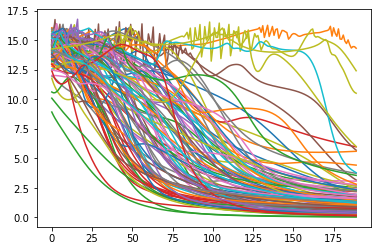

In [3]:
n = 100
m = 200
k = 6

descents = [GradientDescent(U5_, k) for _ in range(n)]

for descent in descents:
    descent.noise = 1
    descent.randomize_params()
    descent.set_j(J)

losses = [descent.descend(steps=m, track_distance=True, time_sensitive=True) for descent in descents]

for loss in losses:
    plt.plot(np.real(loss[10:]))

In [4]:
t_min = 600
p_min = -1
for i in range(n):
    if descents[i].time < 600 and descents[i].distance < 1:
        descents[i].make_times_positive()
        if descents[i].time < t_min:
            t_min = descents[i].time
            p_min = i
        print("i: ", i, " ; distance:", descents[i].distance.round(6).real, "; time:", descents[i].time.round(2))
print(f"Choose descent {p_min} : time={descents[p_min].time}, distance={descents[p_min].distance}")

i:  1  ; distance: 0.2005 ; time: 538.94
i:  4  ; distance: 0.590817 ; time: 428.69
i:  9  ; distance: 0.544066 ; time: 453.76
i:  12  ; distance: 0.25915 ; time: 595.97
i:  39  ; distance: 0.442532 ; time: 599.51
i:  43  ; distance: 0.446661 ; time: 475.31
i:  53  ; distance: 0.688402 ; time: 532.79
i:  54  ; distance: 0.637785 ; time: 365.98
i:  55  ; distance: 0.462793 ; time: 589.19
i:  63  ; distance: 0.799972 ; time: 457.84
i:  67  ; distance: 0.306939 ; time: 541.64
i:  72  ; distance: 0.13988 ; time: 561.96
i:  75  ; distance: 0.907259 ; time: 363.88
i:  77  ; distance: 0.419677 ; time: 544.48
i:  80  ; distance: 0.98899 ; time: 501.12
i:  83  ; distance: 0.196968 ; time: 408.98
i:  85  ; distance: 0.643253 ; time: 522.97
i:  87  ; distance: 0.90606 ; time: 359.68
i:  92  ; distance: 0.058651 ; time: 412.85
Choose descent 87 : time=359.67960594670376, distance=(0.9060596061965894+0j)


In [5]:
descent = descents[p_min]
descent.distance

(0.9060596061965894+0j)

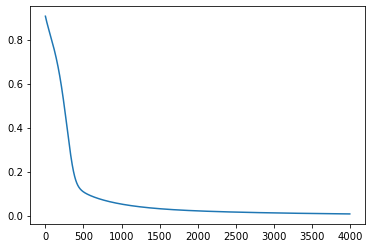

In [6]:
loss = descent.descend(steps=4000, track_distance=True, time_sensitive=False)
plt.plot(np.real(loss))

In [7]:
print(f"Distance: {descent.distance.real}; Time: {descent.time.real}")
descent.to_text("./Oleg/Ud5.txt")





Distance: 0.007624234173046082; Time: 360.34947213880116
